## Can You Predict Product Backorders?
Based on historical data predict backorder risk for products

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.mlab as mlab
import scipy.stats as stats
import seaborn as sns
from scipy import stats

In [17]:
train_data_=train_data


In [18]:
raw_data = pd.read_csv("Kaggle_Training_Dataset_v2.csv")

train_data = (raw_data
              .drop(raw_data.index[len(raw_data)-1])# drop invalid last row
              .replace(['Yes', 'No'], [1, 0]))   # make yes/no numeric

train_data.tail()

C:\Users\Hedi\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2717: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,sku,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,...,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop,went_on_backorder
1687855,1407754,0.0,2.0,0.0,10.0,10.0,10.0,0.0,5.0,7.0,...,0.0,0.69,0.69,5.0,1,0,0,1,0,0
1687856,1373987,-1.0,NaN,0.0,5.0,7.0,9.0,1.0,3.0,3.0,...,0.0,-99.00,-99.00,1.0,0,0,0,1,0,0
1687857,1524346,-1.0,9.0,0.0,7.0,9.0,11.0,0.0,8.0,11.0,...,0.0,0.86,0.84,1.0,1,0,0,0,0,1
1687858,1439563,62.0,9.0,16.0,39.0,87.0,126.0,35.0,63.0,153.0,...,0.0,0.86,0.84,6.0,0,0,0,1,0,0
1687859,1502009,19.0,4.0,0.0,0.0,0.0,0.0,2.0,7.0,12.0,...,0.0,0.73,0.78,1.0,0,0,0,1,0,0


In [19]:
#data Information
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1687860 entries, 0 to 1687859
Data columns (total 23 columns):
sku                  1687860 non-null object
national_inv         1687860 non-null float64
lead_time            1586967 non-null float64
in_transit_qty       1687860 non-null float64
forecast_3_month     1687860 non-null float64
forecast_6_month     1687860 non-null float64
forecast_9_month     1687860 non-null float64
sales_1_month        1687860 non-null float64
sales_3_month        1687860 non-null float64
sales_6_month        1687860 non-null float64
sales_9_month        1687860 non-null float64
min_bank             1687860 non-null float64
potential_issue      1687860 non-null int64
pieces_past_due      1687860 non-null float64
perf_6_month_avg     1687860 non-null float64
perf_12_month_avg    1687860 non-null float64
local_bo_qty         1687860 non-null float64
deck_risk            1687860 non-null int64
oe_constraint        1687860 non-null int64
ppap_risk           

In [20]:
#data description
train_data.describe()

,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,sales_9_month,...,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop,went_on_backorder
count,1.687860e+06,1.586967e+06,1.687860e+06,1.687860e+06,1.687860e+06,1.687860e+06,1.687860e+06,1.687860e+06,1.687860e+06,1.687860e+06,...,1.687860e+06,1.687860e+06,1.687860e+06,1.687860e+06,1.687860e+06,1.687860e+06,1.687860e+06,1.687860e+06,1.687860e+06,1.687860e+06
mean,4.961118e+02,7.872267e+00,4.405202e+01,1.781193e+02,3.449867e+02,5.063644e+02,5.592607e+01,1.750259e+02,3.417288e+02,5.252697e+02,...,2.043724e+00,-6.872059e+00,-6.437947e+00,6.264507e-01,2.295706e-01,1.451542e-04,1.207648e-01,9.638086e-01,4.330928e-04,6.690721e-03
std,2.961523e+04,7.056024e+00,1.342742e+03,5.026553e+03,9.795152e+03,1.437892e+04,1.928196e+03,5.192378e+03,9.613167e+03,1.483861e+04,...,2.360165e+02,2.655636e+01,2.584333e+01,3.372224e+01,4.205568e-01,1.204713e-02,3.258538e-01,1.867661e-01,2.080638e-02,8.152275e-02
min,-2.725600e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,-9.900000e+01,-9.900000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,4.000000e+00,4.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,6.300000e-01,6.600000e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00
50%,1.500000e+01,8.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,2.000000e+00,4.000000e+00,...,0.000000e+00,8.200000e-01,8.100000e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00
75%,8.000000e+01,9.000000e+00,0.000000e+00,4.000000e+00,1.200000e+01,2.000000e+01,4.000000e+00,1.500000e+01,3.100000e+01,4.700000e+01,...,0.000000e+00,9.700000e-01,9.500000e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00
max,1.233440e+07,5.200000e+01,4.894080e+05,1.427612e+06,2.461360e+06,3.777304e+06,7.417740e+05,1.105478e+06,2.146625e+06,3.205172e+06,...,1.464960e+05,1.000000e+00,1.000000e+00,1.253000e+04,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00


In [21]:
#missing values in product
train_data.sku.isnull().sum()

0

In [22]:
#missing value 
train_data.isnull().sum()

sku                       0
national_inv              0
lead_time            100893
in_transit_qty            0
forecast_3_month          0
forecast_6_month          0
forecast_9_month          0
sales_1_month             0
sales_3_month             0
sales_6_month             0
sales_9_month             0
min_bank                  0
potential_issue           0
pieces_past_due           0
perf_6_month_avg          0
perf_12_month_avg         0
local_bo_qty              0
deck_risk                 0
oe_constraint             0
ppap_risk                 0
stop_auto_buy             0
rev_stop                  0
went_on_backorder         0
dtype: int64

In [23]:
prob=len(train_data[train_data.went_on_backorder==1])/len(train_data.sku)
print((prob*100),'%')


0.6690720794378681 %


check the missing data in lead time to replace it or not?
1. Proportion of orders that “went_on_backorder” for missing lead_time records
2. Proportion of orders that “went_on_backorder” for non-null lead_time records

In [24]:
float('NaN')
def my_tilde(x):
    return -x - 1


l = np.array([0, 1, 2, 3])
print(l[0])
print(~l)
~np.isnan(float('NaN'))

0
[-1 -2 -3 -4]


False

In [25]:
n_null_leadTime = train_data[train_data['lead_time'].isnull()].shape[0]
print(n_null_leadTime)
n_non_null_leadTime = train_data[train_data['lead_time'].notnull()].shape[0]
print(n_non_null_leadTime)
n_null_leadTime_backorders =sum(train_data[np.isnan(train_data["lead_time"])]["went_on_backorder"])
print (n_null_leadTime_backorders)
n_non_null_leadTime_backorders = sum(train_data[pd.notnull(train_data["lead_time"])]["went_on_backorder"])
print  (n_non_null_leadTime_backorders)

null_leadTime_backorder_ratio = n_null_leadTime_backorders / float(n_null_leadTime)
non_null_leadTime_backorder_ratio = n_non_null_leadTime_backorders / float(n_non_null_leadTime)
print('Proportion of orders that “went_on_backorder” for no missing lead_time records:',non_null_leadTime_backorder_ratio * 100)
print('Proportion of orders that “went_on_backorder” for missing lead_time records:', null_leadTime_backorder_ratio * 100)


100893
1586967
324
10969
Proportion of orders that “went_on_backorder” for no missing lead_time records: 0.691192696508
Proportion of orders that “went_on_backorder” for missing lead_time records: 0.321132288662


Based on the proportion of orders for missing lead_time_ time of orders went backorder, we can see that the result is 50% less 
than proportion of lead time without missing values, and our total went backorder proportion is around 0.66 and it is close to 
proportion of orders that went back order for non missing values. 
Therefore ....
below we can see the lead time plot and went_backorder type. from the plot we see that 

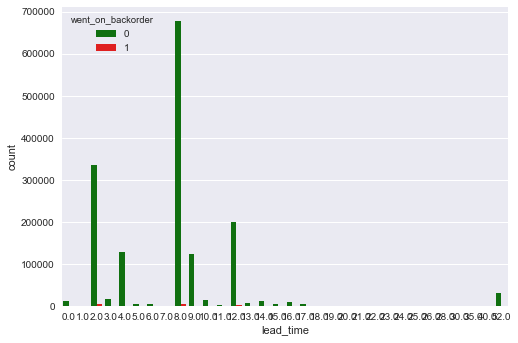

In [28]:
#coorelation between lead time and wen on backorder
scores = train_data[['lead_time','went_on_backorder']]
sns.countplot(x="lead_time", hue="went_on_backorder", data=scores, palette={1: "r", 0: "g"})
plt.show()

[[ 1.        -0.5420028]
 [-0.5420028  1.       ]]


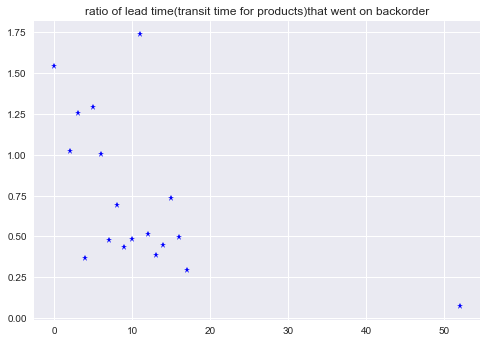

[1.5412425078489203, 1.0245938079797985, 1.2551528948501816, 0.36954339995487684, 1.2900024807740016, 1.006523765144455, 0.4784688995215311, 0.6954115153345275, 0.43348510703685433, 0.48618940248027059, 1.7367458866544789, 0.51276915373059584, 0.38852913968547642, 0.44599573395384917, 0.73452256033578167, 0.49756869840551843, 0.29231995748073347, 0.073058147643874735]


,lead_b,lead_n
0.0,162.0,10349
2.0,3457.0,333945
3.0,204.0,16049
4.0,475.0,128062
5.0,52.0,3979
6.0,54.0,5311
7.0,1.0,208
8.0,4744.0,677442
9.0,536.0,123113
10.0,69.0,14123


In [243]:
import decimal
b=train_data[['went_on_backorder','lead_time']]
backorder=b[b.went_on_backorder==1]
no_backorder=b[b.went_on_backorder==0]
lead_b=backorder.lead_time.value_counts()
lead_n=no_backorder.lead_time.value_counts()
c=[]
df1 = pd.DataFrame(
    {
     'lead_b': lead_b,
     'lead_n':lead_n
    })

df1=df1[['lead_b','lead_n']].dropna()


for i in range(0,len(df1)):
    backorder_ratio=(df1.lead_b.iloc[i])/(df1.lead_n.iloc[i]+df1.lead_b.iloc[i])
    backorder_ratio=backorder_ratio*100
    c.append(backorder_ratio)


print(np.corrcoef(df1.index.values,c))

plt.plot(df1.index.values,c,"*",color="blue")
plt.title('ratio of lead time(transit time for products)that went on backorder')
#plt.plot(np.array(range(len(c))) * 0.25, c,".")
plt.show()
print(c)
df1


[[ 1.          0.79973589]
 [ 0.79973589  1.        ]]


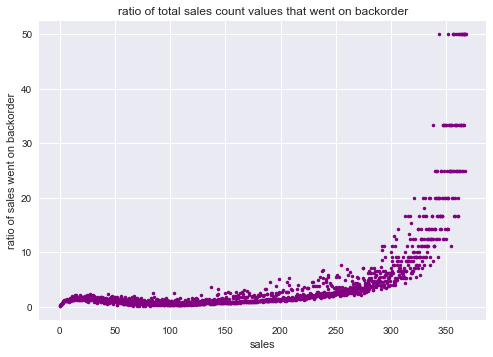

In [240]:
#correlation between sales and backorder

sw=reduced_data[['went_on_backorder','total_sales']]
backorder_sales=sw[sw.went_on_backorder==1]
no_backorder_sales=sw[sw.went_on_backorder==0]
sales_b=backorder_sales.total_sales.value_counts()
sales_n=no_backorder_sales.total_sales.value_counts()
g=[]
df2 = pd.DataFrame(
    {
     'sales_b': sales_b,
     'sales_n':sales_n
    })

df2=df2[['sales_b','sales_n']].dropna()


for i in range(0,len(df2)):
    backorder_ratio=(df2.sales_b.iloc[i])/(df2.sales_n.iloc[i]+df2.sales_b.iloc[i])
    backorder_ratio=backorder_ratio*100
    g.append(backorder_ratio)


print(np.corrcoef(df2.index.values,g))
plt.plot(np.array(range(len(g))) * 0.25, g,".",color='purple')
plt.title('ratio of total sales count values that went on backorder')
plt.xlabel('sales')
plt.ylabel('ratio of sales went on backorder')
plt.show()


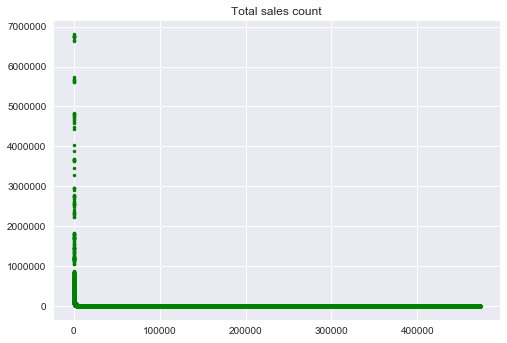

,sku,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,...,perf_6_month_avg,perf_12_month_avg,local_bo_qty,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop,went_on_backorder,total_sales
1416050,3004735,303535.0,8.0,186984.0,1103084.0,2119148.0,3229292.0,361239.0,1104181.0,2133557.0,...,0.82,0.54,0.0,0,0,0,1,0,0,6803906.0
1602060,3198349,341263.0,8.0,212856.0,992540.0,2085044.0,3196364.0,340213.0,1105478.0,2113901.0,...,0.82,0.54,0.0,0,0,0,1,0,0,6764764.0
174594,1286149,419914.0,2.0,109032.0,1218328.0,2446072.0,3760840.0,339390.0,1076623.0,2145715.0,...,0.71,0.45,0.0,0,0,0,1,0,0,6762763.0
384211,1732172,279621.0,8.0,222828.0,970196.0,2036828.0,3158732.0,393665.0,1091281.0,2112231.0,...,0.74,0.50,0.0,0,0,0,1,0,0,6760971.0
842690,2190663,336609.0,8.0,114912.0,1013708.0,2056820.0,3103460.0,358011.0,1094112.0,2123946.0,...,0.82,0.51,0.0,0,0,0,1,0,0,6758217.0
994488,1417987,412617.0,2.0,117156.0,1218328.0,2461360.0,3777304.0,334181.0,1070623.0,2146625.0,...,0.74,0.50,0.0,0,0,0,1,0,0,6748767.0
623334,1971308,211245.0,8.0,327156.0,980780.0,2025068.0,3149324.0,366191.0,1084974.0,2117803.0,...,0.74,0.50,0.0,0,0,0,1,0,0,6736362.0
96294,1207797,297597.0,8.0,165744.0,1037228.0,2087396.0,3206948.0,376025.0,1062979.0,2098852.0,...,0.71,0.45,0.0,0,0,0,1,0,0,6657306.0
1130061,1495050,283185.0,8.0,152892.0,1058396.0,2109740.0,3232820.0,369425.0,1058559.0,2086531.0,...,0.74,0.50,0.0,0,0,0,1,0,0,6635390.0
708526,2056504,561058.0,8.0,168309.0,927648.0,1826208.0,2724768.0,303857.0,930615.0,1775508.0,...,0.63,0.78,0.0,0,0,0,1,0,0,5749960.0


In [251]:
sales_data=train_data
total_sales=(sales_data.sales_1_month+sales_data.sales_3_month+sales_data.sales_6_month+sales_data.sales_9_month)
sales_data['total_sales']=total_sales
reduced_data=sales_data.sort_values('total_sales',ascending = False)

plt.plot(np.array(range(len(reduced_data))) * 0.28, reduced_data.total_sales,".",color="green")
plt.title('Total sales count')
plt.show()
reduced_data

Data reduction by capture 60% of the total sales volume.

In [250]:
m=len(reduced_data.total_sales)*(60/100)
m = int(round(m, 2))
print(m)
sample_data=reduced_data[0:m]
sample_data.head()
#reduced_data=reduced_data.loc[reduced_data['total_sales']<p]

1687860


,sku,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,...,perf_6_month_avg,perf_12_month_avg,local_bo_qty,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop,went_on_backorder,total_sales
1416050,3004735,303535.0,8.0,186984.0,1103084.0,2119148.0,3229292.0,361239.0,1104181.0,2133557.0,...,0.82,0.54,0.0,0,0,0,1,0,0,6803906.0
1602060,3198349,341263.0,8.0,212856.0,992540.0,2085044.0,3196364.0,340213.0,1105478.0,2113901.0,...,0.82,0.54,0.0,0,0,0,1,0,0,6764764.0
174594,1286149,419914.0,2.0,109032.0,1218328.0,2446072.0,3760840.0,339390.0,1076623.0,2145715.0,...,0.71,0.45,0.0,0,0,0,1,0,0,6762763.0
384211,1732172,279621.0,8.0,222828.0,970196.0,2036828.0,3158732.0,393665.0,1091281.0,2112231.0,...,0.74,0.50,0.0,0,0,0,1,0,0,6760971.0
842690,2190663,336609.0,8.0,114912.0,1013708.0,2056820.0,3103460.0,358011.0,1094112.0,2123946.0,...,0.82,0.51,0.0,0,0,0,1,0,0,6758217.0


1846561168.0
1477248934.4


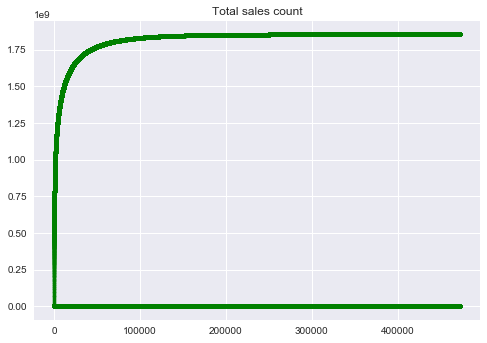

In [267]:
plt.plot(np.array(range(len(sample_data))) * 0.28, sample_data.total_sales,".",color="green")
sales_volume =np.cumsum(sample_data.total_sales)
print(sales_volume[len(sales_volume)-1])
print(0.8 * sales_volume[len(sales_volume)-1])
plt.plot(np.array(range(len(sample_data))) * 0.28, sales_volume,".",color="green")
plt.title('Total sales count')
plt.show()